In [412]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

/Users/mounikanadimpalli/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning:

A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2

python(37107) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [28]:
data=pd.read_excel('/Users/mounikanadimpalli/Downloads/profiles.xlsx')

In [29]:
data

,eid,parentEid,role,city,state,County
0,u-132-3366,NaN,campaignDirector,LOUISVILLE,KY,Jefferson
1,u-132-3395,NaN,organizer,CHESAPEAKE,KY,NaN
2,SrUstdhnK67K8T,u-132-3395,contact,LOUISVILLE,KY,Jefferson
3,0YiLde4r9Z6fEh,u-132-3395,contact,MADISONVILLE,KY,Hopkins
4,2lHrmFrMI6tEKC,u-132-3395,contact,MADISONVILLE,KY,Hopkins
...,...,...,...,...,...,...
19745,q71rOrrpEZ6Dwb,u-132-23134,contact,LOUISVILLE,KY,Jefferson
19746,DaGX0despVU7pn,u-132-23134,contact,LOUISVILLE,KY,Jefferson
19747,81u0TwTYXi4LZW,u-132-23134,contact,PADUCAH,KY,McCracken
19748,1n71eR5zWYbazH,u-132-23134,contact,LOUISVILLE,KY,Jefferson


# Missing Values in County are replaced with Other

In [228]:
data['County'].isna().sum()

3625

In [229]:
data['County'] = data['County'].fillna('Other')

In [231]:
data['role'].value_counts()

contact             19679
volunteer              47
campaignDirector       16
organizer               7
Name: role, dtype: int64

## The campaign was conducted across the state of Kentucky

In [232]:
data.state.value_counts()

KY    19750
Name: state, dtype: int64

In [233]:
contacts_data=data.loc[data.role=='contact']
organizer_data=data.loc[data.role=='organizer']
volunteer_data=data.loc[data.role=='volunteer']
director_data=data.loc[data.role=='campaignDirector']


# Number of Contacts divided by each County 

In [235]:
County_frequency=contacts_data.groupby('County').size().reset_index(name='contacts_in_county')
Total_contacts=County_frequency['contacts_in_county'].sum()
County_frequency=County_frequency.sort_values(by='contacts_in_county', ascending=False).reset_index(drop=True)
County_frequency['Percentage_of_contacts'] = (County_frequency['contacts_in_county'] / Total_contacts) * 100
County_frequency

,County,contacts_in_county,Percentage_of_contacts
0,Jefferson,9759,49.590934
1,Other,3612,18.354591
2,Fayette,2148,10.915189
3,Hardin,884,4.492098
4,Madison,299,1.519386
...,...,...,...
60,Lawrence,13,0.066060
61,Monroe,12,0.060979
62,Bourbon,12,0.060979
63,Todd,10,0.050816


## Pie Chart showing Number of Contacts per County

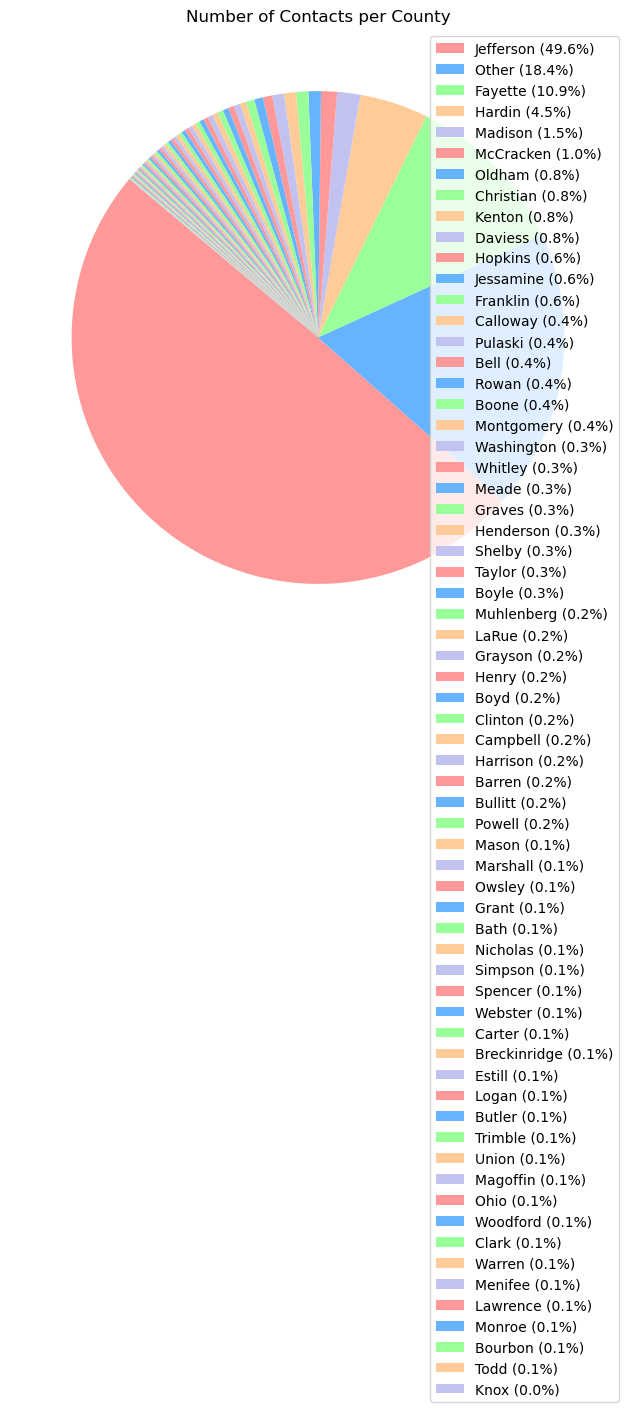

In [430]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']
total_contacts = County_frequency['contacts_in_county'].sum()
percentages = (County_frequency['contacts_in_county'] / total_contacts * 100).round(1)
legend_labels = [f"{county} ({pct}%)" for county, pct in zip(County_frequency['County'], percentages)]
plt.figure(figsize=(8, 8))
patches, texts = plt.pie(County_frequency['contacts_in_county'], 
                         colors=colors, 
                         labels=None, 
                         startangle=140)

plt.title('Number of Contacts per County')
plt.legend(patches, legend_labels, loc="best")
plt.show()


## Top 5 counties account to more than 85 % of contacts

In [400]:

County_frequency.loc[:5]['Percentage_of_contacts'].sum()

85.91899994918441

## Top 5 Counties with most number of contacts

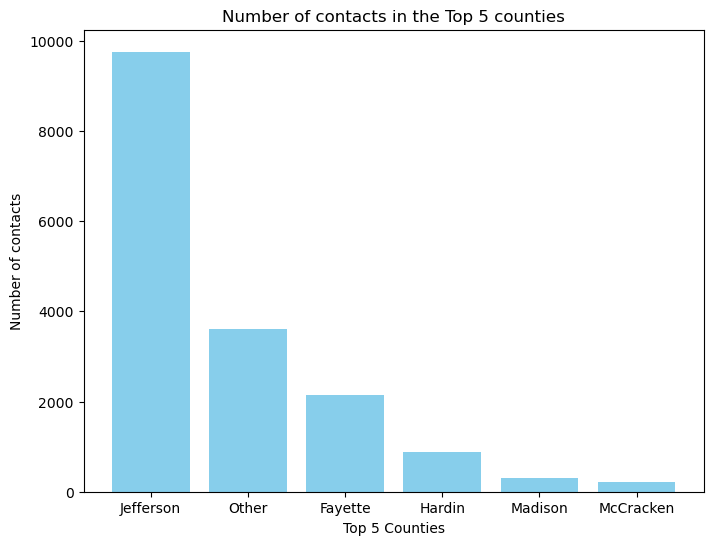

In [421]:
plt.figure(figsize=(8, 6))
plt.bar(County_frequency.loc[:5]['County'], County_frequency.loc[:5]['contacts_in_county'],color='skyblue')
plt.xlabel('Top 5 Counties')
plt.ylabel('Number of contacts')
plt.title('Number of contacts in the Top 5 counties')
plt.show()

## Distribution of different roles in Jefferson County

In [239]:
Jefferson_df=data.loc[(data.County=='Jefferson')]
Jefferson_df.fillna('contact')
Jefferson_df.role.value_counts()

contact             9759
volunteer             22
campaignDirector      11
organizer              5
Name: role, dtype: int64

# Number of Volunteers or Organizers for each County

In [240]:
County_frequency_volunteers=volunteer_data.groupby('County').size().reset_index(name='volunteers_in_county')
Total_volunteers=County_frequency_volunteers['volunteers_in_county'].sum()
County_frequency_volunteers=County_frequency_volunteers.sort_values(by='volunteers_in_county', ascending=False).reset_index(drop=True)
County_frequency_volunteers['Percentage_of_volunteers'] = (County_frequency_volunteers['volunteers_in_county'] / Total_contacts) * 100
County_frequency_volunteers

,County,volunteers_in_county,Percentage_of_volunteers
0,Jefferson,22,0.111794
1,Other,9,0.045734
2,Fayette,4,0.020326
3,Madison,2,0.010163
4,Bath,1,0.005082
5,Campbell,1,0.005082
6,Daviess,1,0.005082
7,Graves,1,0.005082
8,Hardin,1,0.005082
9,Jessamine,1,0.005082


# Organizers per every County

In [401]:

County_frequency_organizers=organizer_data.groupby('County').size().reset_index(name='organizers_in_county')
Total_organizers=County_frequency_organizers['organizers_in_county'].sum()
County_frequency_organizers=County_frequency_organizers.sort_values(by='organizers_in_county', ascending=False).reset_index(drop=True)
County_frequency_organizers['Percentage_of_organizers'] = (County_frequency_organizers['organizers_in_county'] / Total_organizers) * 100
County_frequency_organizers

,County,organizers_in_county,Percentage_of_organizers
0,Jefferson,5,71.428571
1,Fayette,1,14.285714
2,Other,1,14.285714


## Campaign Directors in Each County

In [242]:

County_frequency_directors=director_data.groupby('County').size().reset_index(name='directors_in_county')
Total_directors=County_frequency_directors['directors_in_county'].sum()
County_frequency_directors=County_frequency_directors.sort_values(by='directors_in_county', ascending=False).reset_index(drop=True)
County_frequency_directors['Percentage_of_directors'] = (County_frequency_directors['directors_in_county'] / Total_directors) * 100
County_frequency_directors

,County,directors_in_county,Percentage_of_directors
0,Jefferson,11,68.75
1,Other,3,18.75
2,Fayette,1,6.25
3,Rowan,1,6.25


## Pie Charts displaying Number of Volunteers, Campaign Directors and Number of Volunteers per county

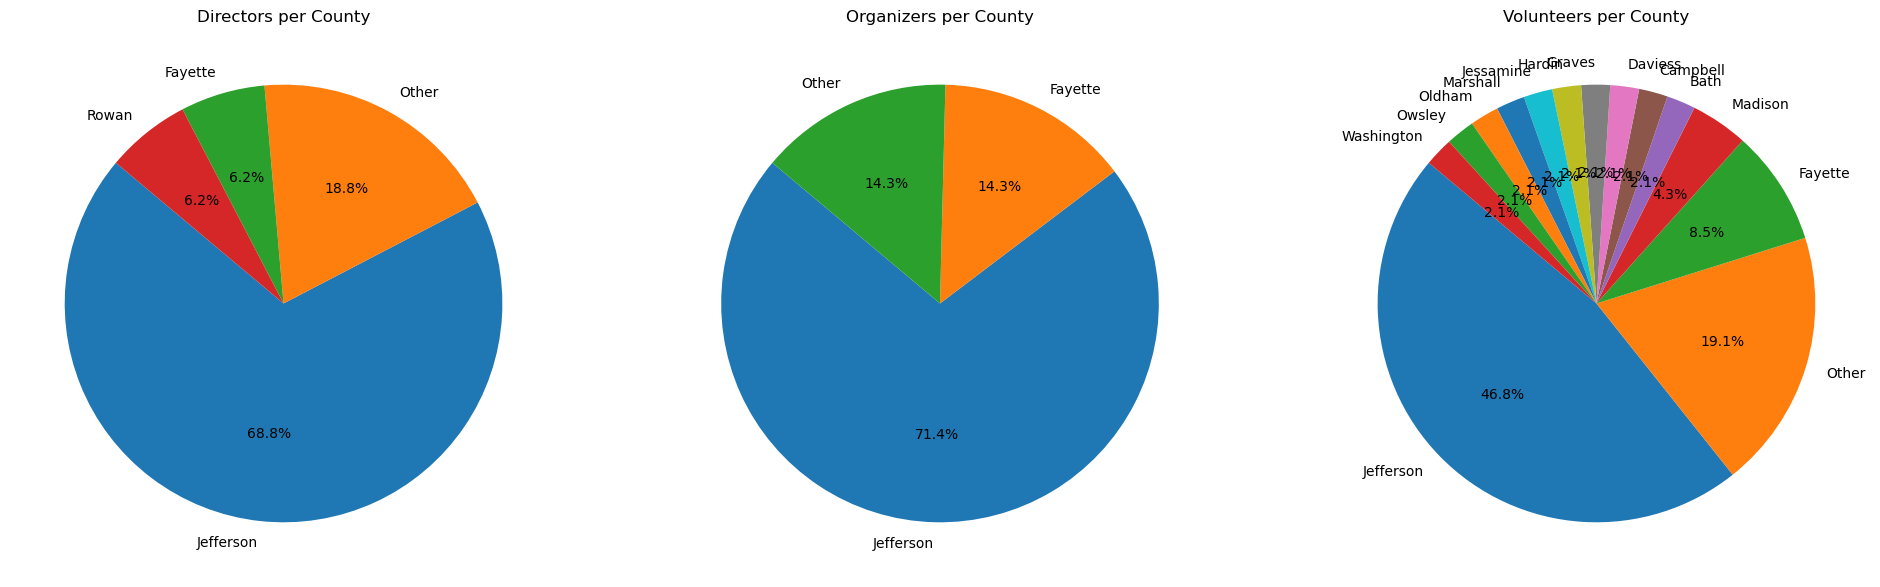

In [243]:

fig, axs = plt.subplots(1, 3, figsize=(24, 8))

axs[0].pie(County_frequency_directors['directors_in_county'], labels=County_frequency_directors['County'], autopct='%1.1f%%', startangle=140)
axs[0].set_title('Directors per County')

axs[1].pie(County_frequency_organizers['organizers_in_county'], labels=County_frequency_organizers['County'], autopct='%1.1f%%', startangle=140)
axs[1].set_title('Organizers per County')

axs[2].pie(County_frequency_volunteers['volunteers_in_county'], labels=County_frequency_volunteers['County'], autopct='%1.1f%%', startangle=140)
axs[2].set_title('Volunteers per County')

plt.show()

## Determining the ultimate parent of each contact

In [330]:
def determine_role(parentEid):
    if parentEid in volunteer_data['eid'].values:
        return 'parent_volunteer'
    elif parentEid in organizer_data['eid'].values:
        return 'parent_organizer'
    elif parentEid in director_data['eid'].values:
        return 'parent_director'
    return None


In [331]:
contacts_data['parent_role']=contacts_data['parentEid'].apply(determine_role)
volunteer_data['parent_role']=volunteer_data['parentEid'].apply(determine_role)

/var/folders/v_/mmd0q6k517gcm4605xkdflmh0000gn/T/ipykernel_19454/2614226046.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Percentage division of contacts by Volunteers ,Organizers and Campaign Directors

In [259]:
parent=contacts_data.groupby('parent_role').size().reset_index(name='Contacts per parent type')
parent['Percentage_of_contacts'] = (parent['Contacts per parent type'] / Total_contacts) * 100
parent=parent.sort_values(by='Percentage_of_contacts',ascending=False)
parent

,parent_role,Contacts per parent type,Percentage_of_contacts
2,parent_volunteer,19250,97.820011
0,parent_director,280,1.422837
1,parent_organizer,149,0.757152


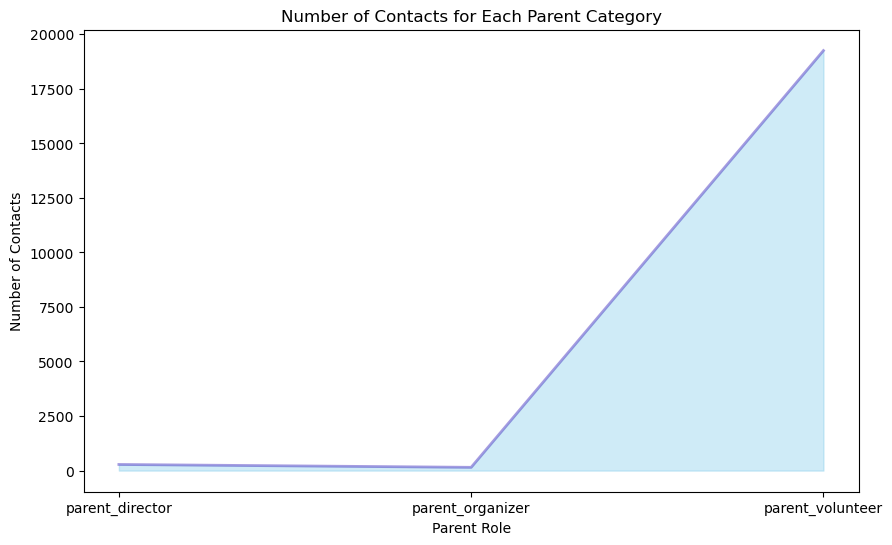

In [248]:
if 'parent_role' in parent.columns:
    parent.set_index('parent_role', inplace=True)
else:
    print("Column 'parent_role' not found. Please check column names.")
plt.figure(figsize=(10, 6))
plt.fill_between(parent.index, parent['Contacts per parent type'], color="skyblue", alpha=0.4)
plt.plot(parent.index, parent['Contacts per parent type'], color="Slateblue", alpha=0.6, linewidth=2)
plt.xlabel('Parent Role')
plt.ylabel('Number of Contacts')
plt.title('Number of Contacts for Each Parent Category')
plt.show()

## Determining how much percentage of contacts and their parent are from same county

In [253]:
def determine_parent_county(row):
    parentEid = row['parentEid']
    origin_county = row['County']
    
    if pd.isna(origin_county) or origin_county == 'Other':
        return 1
    
    parent_rows = data[data.eid == parentEid]
    if parent_rows.empty or parent_rows['County'].isna().all() or parent_rows['County'].iloc[0] == 'Other':
        return 1
    parent_county = parent_rows['County'].iloc[0]
    if parent_county == 'Other' and origin_county == 'Other':
        return 1
    elif parent_county == origin_county:
        return 1
    return 0

contacts_data['parent_county'] = contacts_data.apply(determine_parent_county, axis=1)


/var/folders/v_/mmd0q6k517gcm4605xkdflmh0000gn/T/ipykernel_19454/1371636112.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 60% of the times Volunteers and Organizers, Directors made contacts from their same community

In [264]:
contacts_data.parent_county.value_counts()

1    11679
0     8000
Name: parent_county, dtype: int64

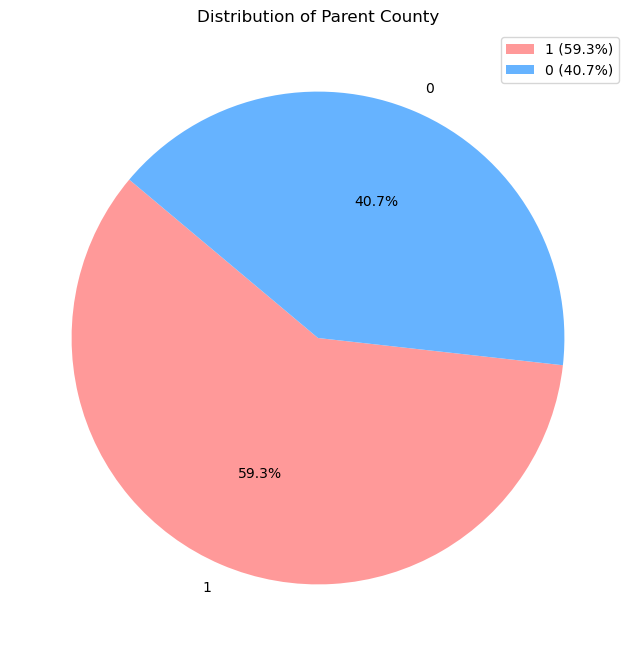

In [432]:
parent_county_counts = contacts_data['parent_county'].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffcc99']
plt.figure(figsize=(8, 8))
plt.pie(parent_county_counts, labels=parent_county_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Parent County')
plt.legend([f"{county} ({pct:.1f}%)" for county, pct in zip(parent_county_counts.index, parent_county_counts/parent_county_counts.sum()*100)], loc="best")
plt.show()

In [404]:
Seniors_performance_Volunteer=volunteer_data.groupby('parentEid').size().reset_index(name='Number of Volunteers')
Seniors_performance_contacts=contacts_data.groupby('parentEid').size().reset_index(name='Number of contacts')
Seniors_performance_contacts=Seniors_performance_contacts.sort_values(by='Number of contacts', ascending=False).reset_index(drop=True)


## Volunteers Grouped by their parent  Organizer or Director

In [397]:
Seniors_performance_Volunteer

,parentEid,Number of Volunteers
0,u-132-18144,11
1,u-132-18147,7
2,u-132-18148,1
3,u-132-18406,3
4,u-132-22245,7
5,u-132-22247,8
6,u-132-22249,4
7,u-132-22252,4
8,u-132-22256,2


## Contacts Grouped by their parent Volunteer, Organizer or Director

In [268]:
Seniors_performance_contacts


,parentEid,Number of contacts
0,u-132-22350,953
1,u-132-22531,929
2,u-132-22381,907
3,u-132-18146,869
4,u-132-22348,860
5,u-132-19129,811
6,u-132-22393,700
7,u-132-18143,646
8,u-132-23129,639
9,u-132-22787,639


## Finding the assigned person for  volunteers who made contacts

In [269]:
parent_eid_dict = data.set_index('eid')['parentEid'].to_dict()

def replace_parent_eid(row):
    parent_eid = row['parentEid']
    if not pd.isna(parent_eid) and parent_eid in parent_eid_dict:
        new_parent_eid = parent_eid_dict.get(parent_eid)
        if not pd.isna(new_parent_eid):
            return new_parent_eid
    return parent_eid


/var/folders/v_/mmd0q6k517gcm4605xkdflmh0000gn/T/ipykernel_19454/3818537900.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [332]:
contacts_data['parentEid'] = contacts_data.apply(replace_parent_eid, axis=1)
volunteer_data['parentEid'] = volunteer_data.apply(replace_parent_eid, axis=1)


/var/folders/v_/mmd0q6k517gcm4605xkdflmh0000gn/T/ipykernel_19454/440925288.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Assessing the Performance of Directors and Organizers based on contacts

In [405]:
role_counts = contacts_data.groupby(['parentEid', 'parent_role']).size().unstack(fill_value=0).reset_index()
role_counts

parent_role,parentEid,parent_director,parent_organizer,parent_volunteer
0,u-132-17979,10,0,0
1,u-132-17986,1,0,0
2,u-132-18144,45,0,8003
3,u-132-18147,112,0,1928
4,u-132-18148,0,0,44
5,u-132-18348,0,106,0
6,u-132-18406,0,0,27
7,u-132-19093,84,0,0
8,u-132-22245,0,0,3171
9,u-132-22247,0,0,3108


In [406]:
Performance = pd.merge(role_counts, Seniors_performance_Volunteer, on='parentEid',how='right')

## Performance Table of Campaign Directors and Organizers


Volunteer Performance metric: A specialized metric that is used to measure the average performance of volunteers that are assigned to directors/Organizers. This metric was calculated by dividing the average contacts of volunteers of a particular director divided by the average contacts made by each volunteer.

Director Performance metric: A specialized metric that is used to measure the average performance of directors in finding contacts.This metric was calculated by dividing the  contacts of directors of a particular director divided by the average contacts made directors on the whole.

In [409]:
Performance['Average_contacts_per_volunteer']=Performance['parent_volunteer']//Performance['Number of Volunteers']
Performance['Volunteer_performance metric']=Performance['Average_contacts_per_volunteer']/avg_contactper_volunteeer
Performance['Director_Performance metric']=(Performance['parent_director']/avg_contactper_director)
Performance

,parentEid,parent_director,parent_organizer,parent_volunteer,Number of Volunteers,Average_contacts_per_volunteer,Volunteer_performance metric,Director_Performance metric
0,u-132-18144,45,0,8003,11,727,1.777506,2.647059
1,u-132-18147,112,0,1928,8,241,0.589242,6.588235
2,u-132-18406,0,0,27,3,9,0.022005,0.000000
3,u-132-22245,0,0,3171,7,453,1.107579,0.000000
4,u-132-22247,0,0,3108,8,388,0.948655,0.000000
5,u-132-22249,2,0,1446,4,361,0.882641,0.117647
6,u-132-22252,1,0,1520,4,380,0.929095,0.058824
7,u-132-22256,25,0,3,2,1,0.002445,1.470588


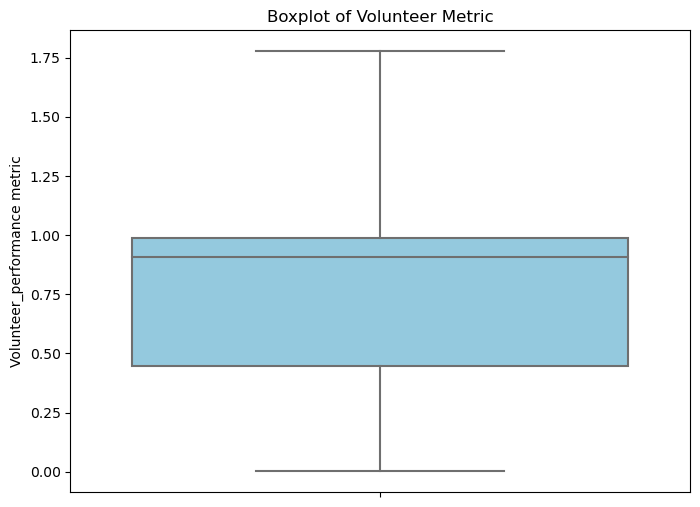

In [413]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=Performance['Volunteer_performance metric'], color='skyblue')
plt.ylabel('Volunteer_performance metric')
plt.title('Boxplot of Volunteer Metric')
plt.show()

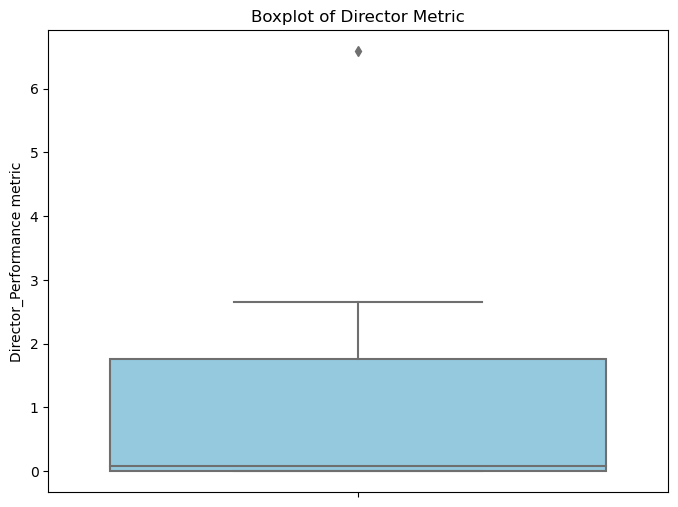

In [415]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=Performance['Director_Performance metric'], color='skyblue')
plt.ylabel('Director_Performance metric')
plt.title('Boxplot of Director Metric')
plt.show()

In [411]:
Performance.describe()

,parent_director,parent_organizer,parent_volunteer,Number of Volunteers,Average_contacts_per_volunteer,Volunteer_performance metric,Director_Performance metric
count,8.000000,8.0,8.000000,8.000000,8.000000,8.000000,8.000000
mean,23.125000,0.0,2400.750000,5.875000,320.000000,0.782396,1.360294
std,39.498418,0.0,2557.156554,3.090885,238.437174,0.582976,2.323436
min,0.000000,0.0,3.000000,2.000000,1.000000,0.002445,0.000000
25%,0.000000,0.0,1091.250000,3.750000,183.000000,0.447433,0.000000
50%,1.500000,0.0,1724.000000,5.500000,370.500000,0.905868,0.088235
75%,30.000000,0.0,3123.750000,8.000000,404.250000,0.988386,1.764706
max,112.000000,0.0,8003.000000,11.000000,727.000000,1.777506,6.588235


## Contacts Data of Best Director

In [275]:
best_director_data=contacts_data.loc[(contacts_data.parentEid=='u-132-18144')]
best_director_data

,eid,parentEid,role,city,state,County,parent_role,parent_county
671,3I1DaKJrm1RHf2,u-132-18144,contact,LOUISVILLE,KY,Jefferson,parent_director,1
672,YBuCPfZzGbjNZ9,u-132-18144,contact,LOUISVILLE,KY,Jefferson,parent_director,1
673,XTXICRukf24x0A,u-132-18144,contact,BEREA,KY,Madison,parent_director,0
674,mMYH37GJVd2Sqc,u-132-18144,contact,CINCINNATI,KY,Other,parent_director,1
675,8s65WHOi90ua52,u-132-18144,contact,LOUISVILLE,KY,Jefferson,parent_director,1
...,...,...,...,...,...,...,...,...
19456,fJPhIwZGJsmDcF,u-132-18144,contact,NaN,KY,Other,parent_volunteer,1
19457,LTDfy7VaKFib4O,u-132-18144,contact,LOUISVILLE,KY,Jefferson,parent_volunteer,1
19458,CoyKWVUGHZAyKx,u-132-18144,contact,LOUISVILLE,KY,Jefferson,parent_volunteer,1
19459,hRSlPje6paBjSz,u-132-18144,contact,ALBANY,KY,Clinton,parent_volunteer,1


In [277]:
best_director_data.County.value_counts()

Jefferson    4064
Other        1457
Fayette       846
Hardin        346
Madison       140
             ... 
Monroe          4
Butler          4
Woodford        4
Logan           3
Trimble         1
Name: County, Length: 65, dtype: int64

In [410]:
contacts_data.parent_role.value_counts()

parent_volunteer    19250
parent_director       280
parent_organizer      149
Name: parent_role, dtype: int64

In [347]:
total_volunteers=len(volunteer_data)
total_contacts=len(contacts_data)
total_directors=len(director_data)
total_organizers=len(organizer_data)
avg_contactper_volunteeer=19250//total_volunteers
avg_contactper_director=280//total_directors
avg_contactper_organizer=149//total_organizers

In [348]:
print("Average Contacts made by a volunteer:",avg_contactper_volunteeer)
print("Average Contacts made by a Director:",avg_contactper_director)
print("Average Contacts made by an Organizer:",avg_contactper_organizer)

Average Contactes made by a volunteer: 409
Average Contacts made by a Director: 17
Average Contacts made by an Organizer: 21


## Best 20 volunteers

In [386]:
best_volunteers=data.loc[(data.role=='contact')]

In [387]:
best_volunteers=best_volunteers.groupby('parentEid').size().reset_index(name='Number of Contacts')
best_volunteers=best_volunteers.sort_values(by='Number of Contacts',ascending=False).reset_index(drop=True)

The following table lists the volunteers in descending order based on the number of contacts they have brought.
contacts

In [391]:
best_volunteers[:20]

,parentEid,Number of Contacts
0,u-132-22350,953
1,u-132-22531,929
2,u-132-22381,907
3,u-132-18146,869
4,u-132-22348,860
5,u-132-19129,811
6,u-132-22393,700
7,u-132-18143,646
8,u-132-23129,639
9,u-132-22787,639


## Best Volunteer

In [396]:
data.loc[(data.eid=='u-132-22350')]

,eid,parentEid,role,city,state,County
9147,u-132-22350,u-132-18144,volunteer,NaN,KY,Other


In [389]:
Best_Volunteers_data = pd.merge(best_volunteers[:20], data, left_on='parentEid', right_on='eid', how='left')

## Out of the 20 best performing Volunteers 9 were from the Jefferson County

In [390]:
Best_Volunteers_data.County.value_counts()

Jefferson    9
Other        4
Fayette      1
Hardin       1
Bath         1
Marshall     1
Oldham       1
Graves       1
Madison      1
Name: County, dtype: int64

In [393]:
Best_Volunteers_data

,parentEid_x,Number of Contacts,eid,parentEid_y,role,city,state,County
0,u-132-22350,953,u-132-22350,u-132-18144,volunteer,NaN,KY,Other
1,u-132-22531,929,u-132-22531,u-132-18144,volunteer,LEXINGTON,KY,Fayette
2,u-132-22381,907,u-132-22381,u-132-18144,volunteer,LOUISVILLE,KY,Jefferson
3,u-132-18146,869,u-132-18146,u-132-18144,volunteer,ELIZABETHTOWN,KY,Hardin
4,u-132-22348,860,u-132-22348,u-132-18144,volunteer,LOUISVILLE,KY,Jefferson
5,u-132-19129,811,u-132-19129,u-132-18144,volunteer,OWINGSVILLE,KY,Bath
6,u-132-22393,700,u-132-22393,u-132-18144,volunteer,BENTON,KY,Marshall
7,u-132-18143,646,u-132-18143,u-132-18147,volunteer,LA GRANGE,KY,Oldham
8,u-132-23129,639,u-132-23129,u-132-18144,volunteer,NaN,KY,Other
9,u-132-22787,639,u-132-22787,u-132-18144,volunteer,LOUISVILLE,KY,Jefferson


## Off the 20 Best Performing Volunteers 10 of them were assigned to the best performing Campaign Director with id u-132-18144

In [399]:
Org_Dire_Best_vol= Best_Volunteers_data.groupby(['parentEid_y']).size().reset_index(name='Number of Contacts')
Org_Dire_Best_vol

,parentEid_y,Number of Contacts
0,u-132-18144,10
1,u-132-18147,2
2,u-132-22245,5
3,u-132-22247,2
4,u-132-22252,1
